# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

Cloning into 'damavand'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 263 (delta 132), reused 196 (delta 65), pack-reused 0 (from 0)
Receiving objects: 100% (263/263), 6.62 MiB | 9.53 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [2]:
!pip install -r damavand/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successful

# Importings

In [1]:
from damavand.damavand.datasets.downloaders import read_addresses, ZipDatasetDownloader
from damavand.damavand.datasets.digestors import KAIST
from damavand.damavand.signal_processing.transformations import *
from damavand.damavand.signal_processing.feature_extraction import *
from damavand.damavand.utils import *
import os
import pandas as pd
import numpy as np
import scipy

# Instantiating a downloader object

In [2]:
addresses = read_addresses()
downloader = ZipDatasetDownloader(addresses['KAIST'])
downloader.download_extract('KAIST.zip', 'KAIST/')

# Instantiating a digestor object

In [3]:
# using only two channels out of four available ones to avoid RAM oveflow
kaist = KAIST('KAIST/', os.listdir('KAIST/'), [0, 1])
mining_params = {
    'win_len': 20000,
    'hop_len': 20000,
}
kaist.mine(mining_params)

# Aggregating data over the first channel

In [4]:
df = pd.concat(kaist.data[0]).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,19993,19994,19995,19996,19997,19998,19999,load,state,severity
0,-1.944207,-1.869208,-0.700953,0.622949,1.509236,2.044446,2.168603,1.390728,1.435319,1.199144,...,0.760928,0.598310,0.039182,-1.434117,-2.607060,-3.098760,-3.737334,0,Unbalance,1751mg
1,-3.483491,-2.891311,-1.911275,0.165863,1.687359,2.457542,3.103087,3.639138,2.771841,2.732539,...,-0.646987,-0.931479,-0.819702,-0.619944,-0.537013,-0.696746,-0.201440,0,Unbalance,1751mg
2,-1.211644,-0.885927,-0.350116,-0.703717,-0.046273,0.956839,0.804317,1.513203,2.280862,0.980156,...,-0.457927,-1.216331,-1.920289,-2.103460,-0.397712,-0.361173,-0.157210,0,Unbalance,1751mg
3,0.037139,-0.502879,-0.406245,0.688573,0.127522,0.873908,0.577036,-1.399622,-1.025468,0.224156,...,0.620305,-0.664295,0.557926,0.104205,-0.254805,-1.375945,-1.342291,0,Unbalance,1751mg
4,-1.445535,-1.056838,0.697708,1.074386,0.055047,0.572469,0.648790,-0.162378,0.219108,0.835326,...,0.436052,0.254324,0.942416,1.173784,0.757202,0.885446,0.511292,0,Unbalance,1751mg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,11.029553,9.238710,2.267160,-5.447049,-4.526868,-4.117498,-9.404333,-6.117354,-0.513335,-0.738573,...,-12.613789,-2.490475,4.834797,10.946742,22.474607,20.914770,7.714329,2,BPFI,10
5726,2.758740,-6.649919,-21.230511,-22.532659,-16.486819,-13.761852,-13.621950,3.862814,11.202989,9.215032,...,-20.135813,-20.691696,-17.724304,11.103351,29.171400,40.736885,27.580194,2,BPFI,10
5727,29.922353,17.379957,-6.027451,-10.810926,-24.749339,-33.270028,-26.654243,-18.569245,-2.376173,13.680843,...,-1.945048,0.506725,6.842345,6.426364,4.083003,7.537048,8.481748,2,BPFI,10
5728,-0.829317,-2.394081,-2.869556,-7.333324,-7.723223,-4.031201,-2.693116,-0.980757,0.632204,5.181908,...,3.109698,-1.915962,-12.598885,-13.542744,-7.100995,-5.017727,-6.237304,2,BPFI,10


# Signals-Metadata declaration

In [5]:
signals, metadata = df.iloc[:, : - 3], df.iloc[:, - 3 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,-1.944207,-1.869208,-0.700953,0.622949,1.509236,2.044446,2.168603,1.390728,1.435319,1.199144,...,1.392050,2.207545,1.707672,0.760928,0.598310,0.039182,-1.434117,-2.607060,-3.098760,-3.737334
1,-3.483491,-2.891311,-1.911275,0.165863,1.687359,2.457542,3.103087,3.639138,2.771841,2.732539,...,1.688441,1.155154,-0.698068,-0.646987,-0.931479,-0.819702,-0.619944,-0.537013,-0.696746,-0.201440
2,-1.211644,-0.885927,-0.350116,-0.703717,-0.046273,0.956839,0.804317,1.513203,2.280862,0.980156,...,0.878355,1.734955,0.886047,-0.457927,-1.216331,-1.920289,-2.103460,-0.397712,-0.361173,-0.157210
3,0.037139,-0.502879,-0.406245,0.688573,0.127522,0.873908,0.577036,-1.399622,-1.025468,0.224156,...,1.915602,0.994098,1.689403,0.620305,-0.664295,0.557926,0.104205,-0.254805,-1.375945,-1.342291
4,-1.445535,-1.056838,0.697708,1.074386,0.055047,0.572469,0.648790,-0.162378,0.219108,0.835326,...,-0.680641,-0.403120,0.002284,0.436052,0.254324,0.942416,1.173784,0.757202,0.885446,0.511292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,11.029553,9.238710,2.267160,-5.447049,-4.526868,-4.117498,-9.404333,-6.117354,-0.513335,-0.738573,...,-5.380103,-13.323276,-15.883461,-12.613789,-2.490475,4.834797,10.946742,22.474607,20.914770,7.714329
5726,2.758740,-6.649919,-21.230511,-22.532659,-16.486819,-13.761852,-13.621950,3.862814,11.202989,9.215032,...,-11.592527,-30.372708,-32.979407,-20.135813,-20.691696,-17.724304,11.103351,29.171400,40.736885,27.580194
5727,29.922353,17.379957,-6.027451,-10.810926,-24.749339,-33.270028,-26.654243,-18.569245,-2.376173,13.680843,...,-8.085358,-3.086140,-1.875097,-1.945048,0.506725,6.842345,6.426364,4.083003,7.537048,8.481748
5728,-0.829317,-2.394081,-2.869556,-7.333324,-7.723223,-4.031201,-2.693116,-0.980757,0.632204,5.181908,...,24.585999,19.187387,7.661205,3.109698,-1.915962,-12.598885,-13.542744,-7.100995,-5.017727,-6.237304


In [6]:
metadata

,load,state,severity
0,0,Unbalance,1751mg
1,0,Unbalance,1751mg
2,0,Unbalance,1751mg
3,0,Unbalance,1751mg
4,0,Unbalance,1751mg
...,...,...,...
5725,2,BPFI,10
5726,2,BPFI,10
5727,2,BPFI,10
5728,2,BPFI,10


# Signal Processing

## Envelope Extraction

In [7]:
signals_env = env(signals)
signals_env.shape

(5730, 20000)

## FFT

In [8]:
# Defenition of a window (to avoid leakage error) and a bandpass frequency filter (to both avoid aliasing and DC-component removal)
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 12500], 'bandpass', fs = 25600, output='sos')

In [9]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(5730, 10000)

## ZoomedFFT

In [10]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 2500, 2500, 25600, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(5730, 2500)

## STFT

In [11]:
# Defenition of a window (to avoid leakage error) and a bandpass frequency filter (to both avoid aliasing and DC-component removal)
STFT_window = scipy.signal.windows.hann(4000) # the length of the window must match the `window_len` argument from the stft function
STFT_freq_filter = scipy.signal.butter(25, [5, 12500], 'bandpass', fs = 25600, output='sos')

In [12]:
signals_env_STFT = stft(signals_env, 4000, 2000, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(5730, 9, 2000)

## Statistical Features

In [13]:
# Defining the feature-set to be extracted
features = {'mean': (np.mean, (), {}), 'var': (np.var, (), {}), 'rms': (rms, (), {})}

In [14]:
# Extracting the desired feature-set from time-domain signals
features_df = feature_extractor(signals, features)
features_df

,mean,var,rms
0,-0.004402,0.988075,0.994029
1,-0.002861,0.997338,0.998672
2,0.000540,0.995953,0.997975
3,-0.001185,0.968905,0.984331
4,-0.000524,1.015189,1.007566
...,...,...,...
5725,-0.002470,183.735440,13.554905
5726,-0.009952,183.644658,13.551559
5727,0.009894,182.985433,13.527214
5728,0.006107,181.833258,13.484558


# Visualization

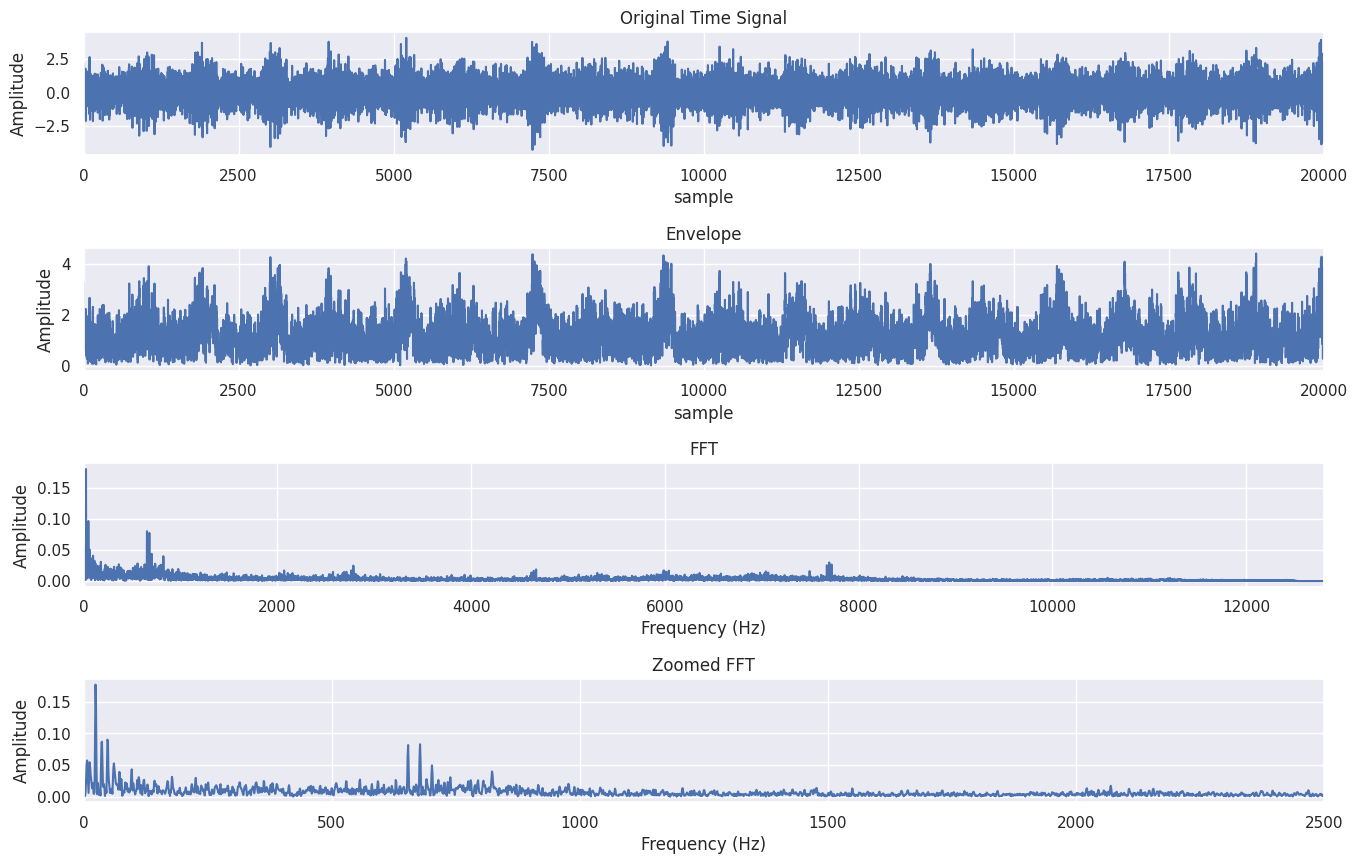

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 20000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 20000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(20000, 25600), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 12800)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 2500, 2500), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 2500)


plt.subplots_adjust(hspace = 0.75)
fig.show()

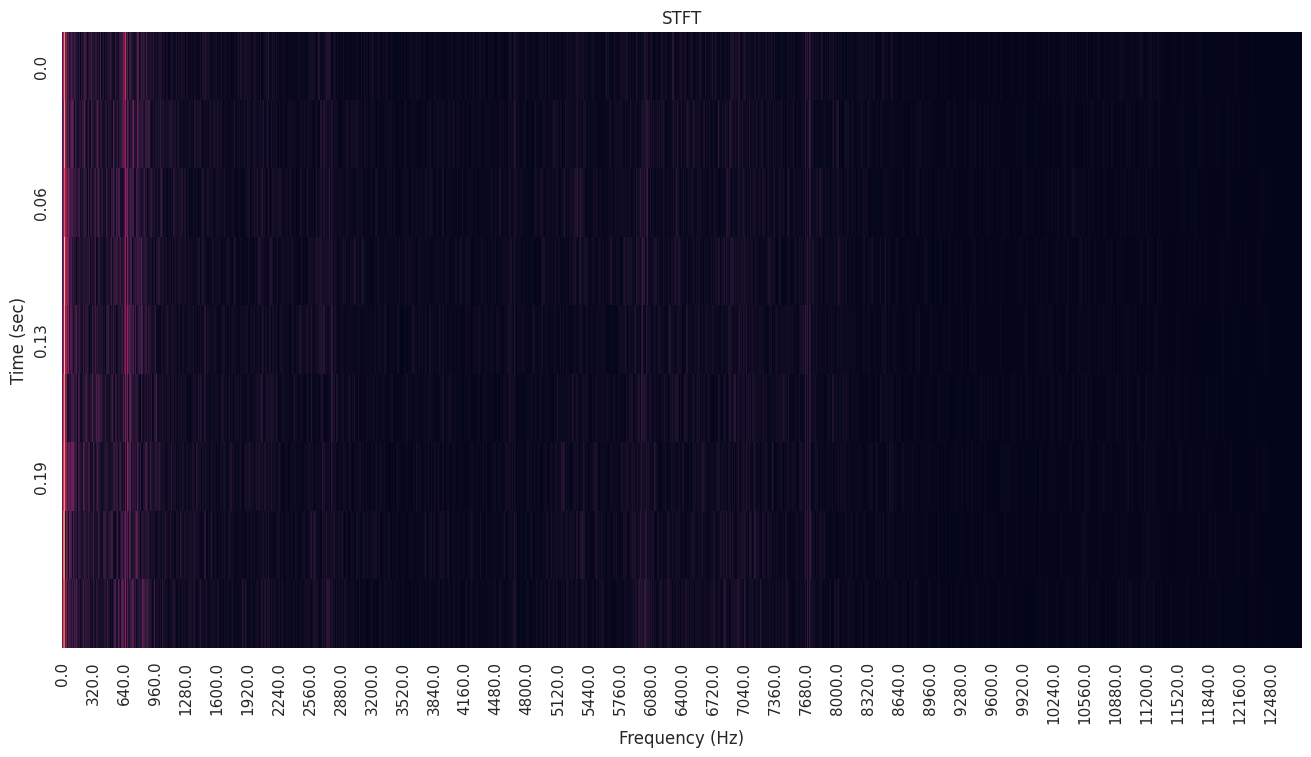

In [16]:
t = np.linspace(0, 0.222, 8)
f = fft_freq_axis(4000, 25600)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::50])
ax.set_yticks(ax.get_yticks()[::2])


fig.show()